**Questão 9 - Letra A**

In [1]:
# Importação das bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.fft import fft2, ifft2, fftshift, ifftshift

image_path = "cameraman_pattern.png" 
# Lê a imagem no formato de tons de cinza
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Converte a imagem do domínio espacial para o domínio da frequência
f = fft2(img)

# Centraliza as frequências baixas no meio da imagem
fshift = fftshift(f)

# Calcula o espectro de magnitude
# O logaritmo é usado para melhorar a visualização (senão os valores seriam muito grandes)
magnitude_spectrum = np.log(np.abs(fshift) + 1)

# Criação de uma máscara passa-baixa circular
# Só as frequências que estiverem dentro desse círculo serão mantidas.
rows, cols = img.shape # Obtém o tamanho da imagem
crow, ccol = rows // 2, cols // 2 # Calcula as coordenadas do centro da imagem

# O valor 105 foi escolhido na prática, depois de vários testes, para equilibrar suavização e detalhes.
radius = 105

# Cria uma grade de coordenadas (linhas e colunas)
Y, X = np.ogrid[:rows, :cols]

# Calcula a distância de cada pixel até o centro da imagem
distance_from_center = np.sqrt((X - ccol)**2 + (Y - crow)**2)

# Cria a máscara:
# - True (1) para os pontos dentro do círculo (deixa passar)
# - False (0) para os pontos fora do círculo (bloqueia)
lowpass_mask = distance_from_center <= radius

# Aplica a máscara na imagem no domínio da frequência
# Mantém apenas as frequências baixas
f_lowpass_filtered = fshift * lowpass_mask

# Calcula o espectro de magnitude da imagem filtrada
magnitude_spectrum_lowpass = np.log(np.abs(f_lowpass_filtered) + 1)

# Primeiro, desfaz o deslocamento do centro
f_ishift = ifftshift(f_lowpass_filtered)

# Depois aplica a Transformada Inversa de Fourier
# Volta do domínio da frequência para o domínio espacial (imagem normal)
img_lowpass = np.abs(ifft2(f_ishift))

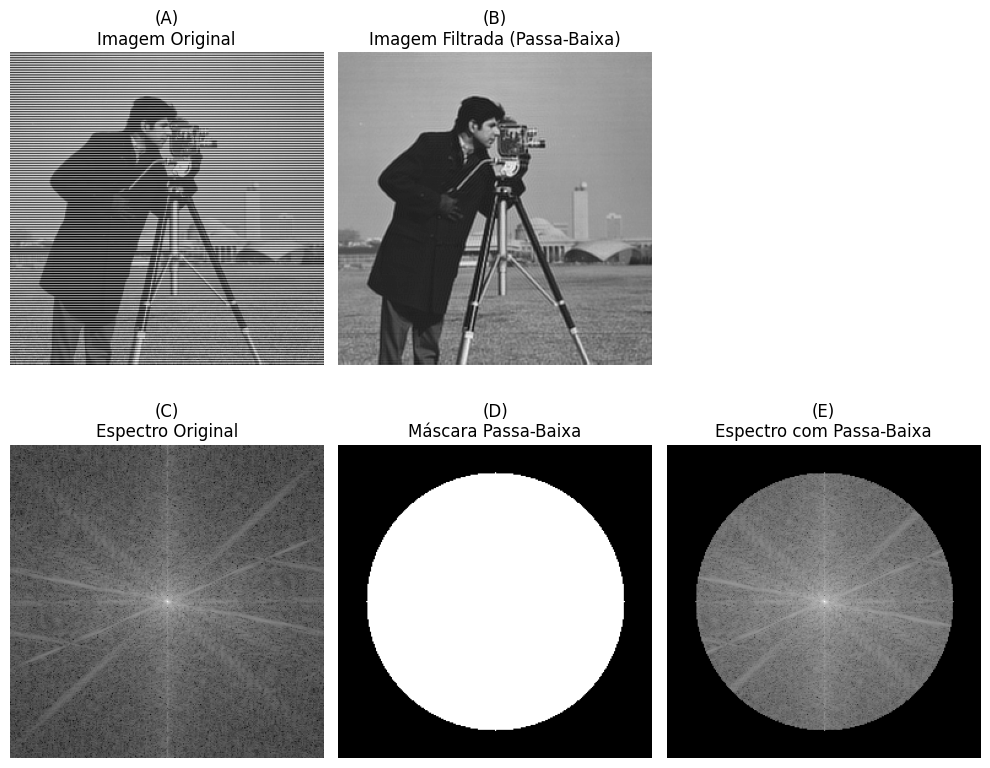

In [2]:
# Exibição das imagens geradas
fig, axs = plt.subplots(2, 3, figsize=(10, 8))

axs[0][0].imshow(img, cmap='gray')
axs[0][0].set_title("(A)\nImagem Original")
axs[0][0].axis('off')

axs[0][1].imshow(img_lowpass, cmap='gray')
axs[0][1].set_title("(B)\nImagem Filtrada (Passa-Baixa)")
axs[0][1].axis('off')
axs[0][2].axis('off')

axs[1][0].imshow(magnitude_spectrum, cmap='gray')
axs[1][0].set_title("(C)\nEspectro Original")
axs[1][0].axis('off')

axs[1][1].imshow(lowpass_mask, cmap='gray')
axs[1][1].set_title("(D)\nMáscara Passa-Baixa")
axs[1][1].axis('off')

axs[1][2].imshow(magnitude_spectrum_lowpass, cmap='gray')
axs[1][2].set_title("(E)\nEspectro com Passa-Baixa")
axs[1][2].axis('off')

plt.tight_layout()
plt.show()

**Questão 9 - Letra B**

In [3]:
# Criação do filtro personalizado
# A ideia é suavizar linhas horizontais na imagem.
# Para isso, fazemos a média entre o pixel atual e o pixel logo abaixo,
# reduzindo as mudanças verticais causadas pelas linhas horizontais.
h =  1/2* np.array([[0, 0, 0], # Ignora os outros pixels
                    [0, 1, 0], # Considera o pixel atual
                    [0, 1, 0]]) # Considera o pixel logo abaixo

# Aplica o filtro na imagem
# A função filter2D realiza a operação de convolução:
# para cada posição da imagem, aplica o filtro (kernel) que criamos.
# 
# Parâmetros:
# - src: imagem original onde o filtro será aplicado
# - ddepth: profundidade da imagem de saída (-1 mantém igual à imagem original)
# - kernel: o filtro h definido acima
filtered_img = cv2.filter2D(src=img, ddepth=-1, kernel=h)


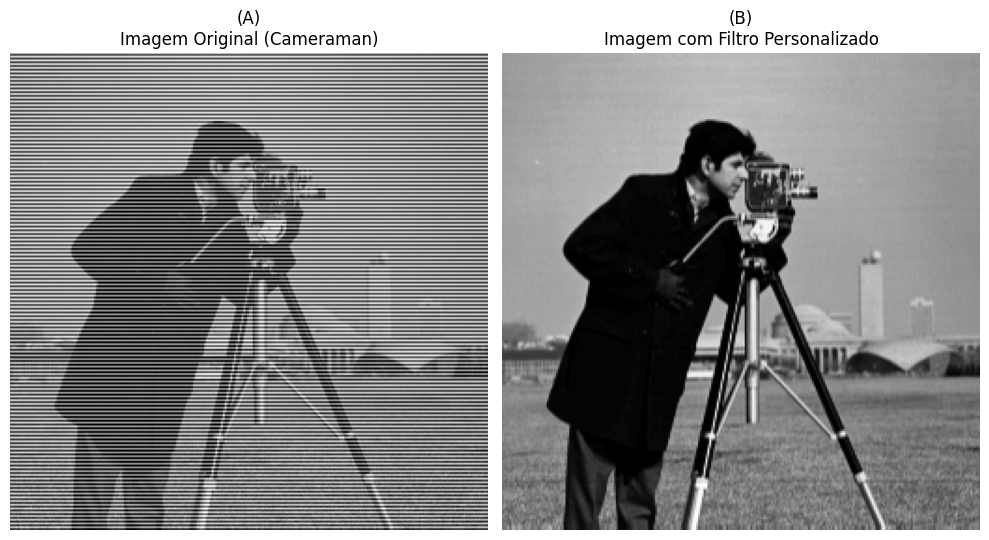

In [4]:
# Exibição das imagens geradas
fig, axs = plt.subplots(1, 2, figsize=(10, 8))
axs[0].imshow(img, cmap='gray')
axs[0].set_title("(A)\nImagem Original (Cameraman)")
axs[0].axis('off')

axs[1].imshow(filtered_img, cmap='gray')
axs[1].set_title("(B)\nImagem com Filtro Personalizado")
axs[1].axis('off')

plt.tight_layout()
plt.show()